In [27]:
from refine import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
# prody
import prody as pdy

# simtk
import simtk.openmm.app as app
import simtk.openmm as omm
from simtk.unit import *

from pdbfixer import PDBFixer

# BioPython
from Bio import SeqIO

import project
project.setup()

import numpy as np



In [2]:
omm_protein = app.PDBFile(str(project.data_path / "benchmark" / "modeled" / "1zhi_modeled.pdb"))

In [13]:
dir(omm_protein.topology)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_bonds',
 '_chains',
 '_hasLoadedStandardBonds',
 '_numAtoms',
 '_numResidues',
 '_periodicBoxVectors',
 '_standardBonds',
 'addAtom',
 'addBond',
 'addChain',
 'addResidue',
 'atoms',
 'bonds',
 'chains',
 'createDisulfideBonds',
 'createStandardBonds',
 'getNumAtoms',
 'getNumBonds',
 'getNumChains',
 'getNumResidues',
 'getPeriodicBoxVectors',
 'getUnitCellDimensions',
 'loadBondDefinitions',
 'residues',
 'setPeriodicBoxVectors',
 'setUnitCellDimensions']

In [4]:
omm_protein.getPositions().value_in_unit(angstrom)

[(-25.033, 26.159, 126.82600000000001),
 (-24.444, 25.138, 126.60200000000002),
 (-26.154000000000003, 25.742000000000004, 126.883),
 (-24.927, 26.718000000000004, 125.774),
 (-24.502000000000002, 26.565000000000005, 128.169),
 (-25.150000000000002, 26.157000000000004, 129.082),
 (-23.374000000000002, 26.182, 128.245),
 (-24.502000000000002, 28.071, 128.401),
 (-23.732000000000003, 28.588000000000005, 129.219),
 (-25.366, 28.771000000000004, 127.67200000000001),
 (-26.334, 28.216, 127.262),
 (-25.542, 30.205000000000002, 127.827),
 (-24.795, 30.556, 128.677),
 (-26.951, 30.459, 128.317),
 (-27.883, 29.794, 127.87300000000002),
 (-25.358, 30.906000000000002, 126.48600000000002),
 (-25.962, 31.929, 126.429),
 (-25.892, 30.198, 125.68800000000002),
 (-23.930000000000003, 31.051000000000002, 126.044),
 (-23.187, 30.137, 125.34500000000001),
 (-23.376, 29.021000000000004, 124.98400000000001),
 (-23.082, 32.192, 126.232),
 (-21.834000000000003, 31.893, 125.637),
 (-23.246, 33.444, 126.86),
 

In [5]:
print(omm_protein.topology.getNumBonds())
for atom in omm_protein.topology.atoms():
    print(atom.residue.index, atom.index, atom.name)

5324
0 0 N
0 1 H
0 2 H2
0 3 H3
0 4 CA
0 5 HA2
0 6 HA3
0 7 C
0 8 O
1 9 N
1 10 H
1 11 CA
1 12 HA
1 13 C
1 14 O
1 15 CB
1 16 HB2
1 17 HB3
1 18 CG
1 19 CD1
1 20 HD1
1 21 CD2
1 22 CE2
1 23 CE3
1 24 HE3
1 25 NE1
1 26 HE1
1 27 CZ2
1 28 HZ2
1 29 CZ3
1 30 HZ3
1 31 CH2
1 32 HH2
2 33 N
2 34 H
2 35 CA
2 36 HA
2 37 C
2 38 O
2 39 CB
2 40 HB2
2 41 HB3
2 42 CG
2 43 HG2
2 44 HG3
2 45 CD
2 46 OE1
2 47 OE2
3 48 N
3 49 H
3 50 CA
3 51 HA
3 52 C
3 53 O
3 54 CB
3 55 HB
3 56 CG1
3 57 HG12
3 58 HG13
3 59 CG2
3 60 HG21
3 61 HG22
3 62 HG23
3 63 CD1
3 64 HD11
3 65 HD12
3 66 HD13
4 67 N
4 68 H
4 69 CA
4 70 HA
4 71 C
4 72 O
4 73 CB
4 74 HB
4 75 CG1
4 76 HG12
4 77 HG13
4 78 CG2
4 79 HG21
4 80 HG22
4 81 HG23
4 82 CD1
4 83 HD11
4 84 HD12
4 85 HD13
5 86 N
5 87 H
5 88 CA
5 89 HA
5 90 C
5 91 O
5 92 CB
5 93 HB
5 94 CG2
5 95 HG21
5 96 HG22
5 97 HG23
5 98 OG1
5 99 HG1
6 100 N
6 101 H
6 102 CA
6 103 HA
6 104 C
6 105 O
6 106 CB
6 107 HB
6 108 CG2
6 109 HG21
6 110 HG22
6 111 HG23
6 112 OG1
6 113 HG1
7 114 N
7 115 H
7 116 CA
7 

97 1552 C
97 1553 O
97 1554 CB
97 1555 HB2
97 1556 HB3
97 1557 CG
97 1558 ND2
97 1559 HD21
97 1560 HD22
97 1561 OD1
98 1562 N
98 1563 H
98 1564 CA
98 1565 HA
98 1566 C
98 1567 O
98 1568 CB
98 1569 HB2
98 1570 HB3
98 1571 CG
98 1572 CD1
98 1573 HD1
98 1574 CD2
98 1575 HD2
98 1576 CE1
98 1577 HE1
98 1578 CE2
98 1579 HE2
98 1580 CZ
98 1581 OH
98 1582 HH
99 1583 N
99 1584 H
99 1585 CA
99 1586 HA
99 1587 C
99 1588 O
99 1589 CB
99 1590 HB2
99 1591 HB3
99 1592 CG
99 1593 CD1
99 1594 HD1
99 1595 CD2
99 1596 HD2
99 1597 CE1
99 1598 HE1
99 1599 CE2
99 1600 HE2
99 1601 CZ
99 1602 OH
99 1603 HH
100 1604 N
100 1605 H
100 1606 CA
100 1607 HA
100 1608 C
100 1609 O
100 1610 CB
100 1611 HB2
100 1612 HB3
100 1613 CG
100 1614 ND2
100 1615 HD21
100 1616 HD22
100 1617 OD1
101 1618 N
101 1619 H
101 1620 CA
101 1621 HA
101 1622 C
101 1623 O
101 1624 CB
101 1625 HB2
101 1626 HB3
101 1627 CG
101 1628 HG2
101 1629 HG3
101 1630 CD
101 1631 HD2
101 1632 HD3
101 1633 CE
101 1634 HE2
101 1635 HE3
101 1636 NZ
101 16

154 2477 C
154 2478 O
154 2479 CB
154 2480 HB2
154 2481 HB3
154 2482 CG
154 2483 HG2
154 2484 HG3
154 2485 CD
154 2486 HD2
154 2487 HD3
154 2488 NE
154 2489 HE
154 2490 CZ
154 2491 NH1
154 2492 HH11
154 2493 HH12
154 2494 NH2
154 2495 HH21
154 2496 HH22
155 2497 N
155 2498 H
155 2499 CA
155 2500 HA
155 2501 C
155 2502 O
155 2503 CB
155 2504 HB2
155 2505 HB3
155 2506 CG
155 2507 CD1
155 2508 HD1
155 2509 CD2
155 2510 HD2
155 2511 CE1
155 2512 HE1
155 2513 CE2
155 2514 HE2
155 2515 CZ
155 2516 OH
155 2517 HH
156 2518 N
156 2519 H
156 2520 CA
156 2521 HA
156 2522 C
156 2523 O
156 2524 CB
156 2525 HB
156 2526 CG1
156 2527 HG12
156 2528 HG13
156 2529 CG2
156 2530 HG21
156 2531 HG22
156 2532 HG23
156 2533 CD1
156 2534 HD11
156 2535 HD12
156 2536 HD13
157 2537 N
157 2538 H
157 2539 CA
157 2540 HA
157 2541 C
157 2542 O
157 2543 CB
157 2544 HB2
157 2545 HB3
157 2546 SG
157 2547 HG
158 2548 N
158 2549 H
158 2550 CA
158 2551 HA
158 2552 C
158 2553 O
158 2554 CB
158 2555 HB2
158 2556 HB3
158 2557 

212 3441 HB3
212 3442 CG
212 3443 HG
212 3444 CD1
212 3445 HD11
212 3446 HD12
212 3447 HD13
212 3448 CD2
212 3449 HD21
212 3450 HD22
212 3451 HD23
213 3452 N
213 3453 H
213 3454 CA
213 3455 HA
213 3456 C
213 3457 O
213 3458 CB
213 3459 HB1
213 3460 HB2
213 3461 HB3
214 3462 N
214 3463 H
214 3464 CA
214 3465 HA
214 3466 C
214 3467 O
214 3468 CB
214 3469 HB2
214 3470 HB3
214 3471 CG
214 3472 HG2
214 3473 HG3
214 3474 CD
214 3475 OE1
214 3476 OE2
215 3477 N
215 3478 H
215 3479 CA
215 3480 HA
215 3481 C
215 3482 O
215 3483 CB
215 3484 HB2
215 3485 HB3
215 3486 CG
215 3487 HG2
215 3488 HG3
215 3489 CD
215 3490 OE1
215 3491 OE2
216 3492 N
216 3493 H
216 3494 CA
216 3495 HA
216 3496 C
216 3497 O
216 3498 CB
216 3499 HB2
216 3500 HB3
216 3501 CG
216 3502 HG2
216 3503 HG3
216 3504 CD
216 3505 HD2
216 3506 HD3
216 3507 CE
216 3508 HE2
216 3509 HE3
216 3510 NZ
216 3511 HZ1
216 3512 HZ2
216 3513 HZ3
217 3514 N
217 3515 CA
217 3516 HA
217 3517 C
217 3518 O
217 3519 CB
217 3520 HB2
217 3521 HB3
217 

263 4318 CG
263 4319 CD1
263 4320 HD1
263 4321 CD2
263 4322 HD2
263 4323 CE1
263 4324 HE1
263 4325 CE2
263 4326 HE2
263 4327 CZ
263 4328 HZ
264 4329 N
264 4330 H
264 4331 CA
264 4332 HA
264 4333 C
264 4334 O
264 4335 CB
264 4336 HB2
264 4337 HB3
264 4338 CG
264 4339 HG2
264 4340 HG3
264 4341 CD
264 4342 HD2
264 4343 HD3
264 4344 CE
264 4345 HE2
264 4346 HE3
264 4347 NZ
264 4348 HZ1
264 4349 HZ2
264 4350 HZ3
265 4351 N
265 4352 H
265 4353 CA
265 4354 HA
265 4355 C
265 4356 O
265 4357 CB
265 4358 HB2
265 4359 HB3
265 4360 CG
265 4361 CD1
265 4362 HD1
265 4363 CD2
265 4364 HD2
265 4365 CE1
265 4366 HE1
265 4367 CE2
265 4368 HE2
265 4369 CZ
265 4370 HZ
266 4371 N
266 4372 H
266 4373 CA
266 4374 HA
266 4375 C
266 4376 O
266 4377 CB
266 4378 HB2
266 4379 HB3
266 4380 SG
266 4381 HG
267 4382 N
267 4383 H
267 4384 CA
267 4385 HA
267 4386 C
267 4387 O
267 4388 CB
267 4389 HB2
267 4390 HB3
267 4391 CG
267 4392 HG2
267 4393 HG3
267 4394 CD
267 4395 HD2
267 4396 HD3
267 4397 CE
267 4398 HE2
267 43

In [75]:
def bound_hessian(omm_protein, bound_constant=10, unbound_constant=1, cutoff=7.5):
    n = omm_protein.topology.getNumAtoms()
    hessian_matrix = np.zeros((3 * n, 3 * n))
    bondedTo = {a.index: set() for a in omm_protein.topology.atoms()}
    positions = omm_protein.getPositions().value_in_unit(angstrom)
    for bond in omm_protein.topology.bonds():
        index1 = bond.atom1.index
        index2 = bond.atom2.index
        bondedTo[index1].add(index2)
        bondedTo[index2].add(index1)
    for i, atom1 in enumerate(omm_protein.topology.atoms()):
        for j, atom2 in enumerate(omm_protein.topology.atoms()):
            if i == j:
                continue
            pos1 = positions[atom1.index]
            pos2 = positions[atom2.index]
            rij = np.linalg.norm(pos2 - pos1)
            if rij >= cutoff:
                continue
            if atom2.index in bondedTo[atom1.index]:
                k = -bound_constant / rij ** 2
            else:
                k = -unbound_constant / rij ** 2
            for a in range(3):
                for b in range(3):
                    hessian_matrix[i * 3 + a, j * 3 + b] = k * (pos2[a] - pos1[a]) * (pos2[b] - pos1[b])
    for i in range(n):
        for j in range(n):
            if i == j:
                continue
            hessian_matrix[(i * 3):(i * 3 + 3), (i * 3):(i * 3 + 3)] -= hessian_matrix[(i * 3):(i * 3 + 3), (j * 3):(j * 3 + 3)]
    return hessian_matrix

In [8]:
def surface_hessian(omm_protein, surface_constant=10, internal_constant=1, cutoff=7.5, surface_cutoff=4.0, surface_count=15):
    n = omm_protein.topology.getNumAtoms()
    hessian_matrix = np.zeros((3 * n, 3 * n))
    surface_factors = np.zeros((n,))
    positions = omm_protein.getPositions().value_in_unit(angstrom)
    for i, atom1 in enumerate(omm_protein.topology.atoms()):
        for j, atom2 in enumerate(omm_protein.topology.atoms()):
            if i == j:
                continue
            pos1 = positions[atom1.index]
            pos2 = positions[atom2.index]
            rij = np.linalg.norm(pos2 - pos1)
            if rij < surface_cutoff:
                surface_factors[i] += 1
    for i, atom1 in enumerate(omm_protein.topology.atoms()):
        for j, atom2 in enumerate(omm_protein.topology.atoms()):
            if i == j:
                continue
            pos1 = positions[atom1.index]
            pos2 = positions[atom2.index]
            rij = np.linalg.norm(pos2 - pos1)
            if rij >= cutoff:
                continue
            if surface_factors[i] > surface_count and surface_factors[j] > surface_count:
                k = -surface_constant_constant / rij ** 2
            else:
                k = -internal_constant / rij ** 2
            for a in range(3):
                for b in range(3):
                    hessian_matrix[i * 3 + a, j * 3 + b] = k * (pos2[a] - pos1[a]) * (pos2[b] - pos1[b])
    for i in range(n):
        for j in range(n):
            if i == j:
                continue
            hessian_matrix[(i * 3):(i * 3 + 3), (i * 3):(i * 3 + 3)] -= hessian_matrix[(i * 3):(i * 3 + 3), (j * 3):(j * 3 + 3)]
    return hessian_matrix

In [58]:
def get_points(bounds, step):
    v = int(bounds[0])
    points = []
    while v < bounds[1]:
        if v > bounds[0]:
            points.append(v)
        v += step
    return points


def get_neighbours(point, step):
    neighbours = []
    for i in range(3):
        neighbour = list(point)
        neighbour[i] += step
        neighbours.append(tuple(neighbour))
    for i in range(3):
        neighbour = list(point)
        neighbour[i] -= step
        neighbours.append(tuple(neighbour))
    return neighbours


def find_surface(omm_protein, grid_step=2, depth=5.5):
    internal_grid = set()
    atoms = list(omm_protein.topology.atoms())
    positions = omm_protein.getPositions().value_in_unit(angstrom)
    for pos in positions:
        offset = grid_step * 3
        x_bounds = (pos[0] - offset, pos[0] + offset)
        y_bounds = (pos[1] - offset, pos[1] + offset)
        z_bounds = (pos[2] - offset, pos[2] + offset)
        x_points = get_points(x_bounds, grid_step)
        y_points = get_points(y_bounds, grid_step)
        z_points = get_points(z_bounds, grid_step)
        for x in x_points:
            for y in y_points:
                for z in z_points:
                    internal_grid.add((x, y, z))
    surface_grid = set()
    for ip in internal_grid:
        for neighbour in get_neighbours(ip, grid_step):
            if neighbour not in internal_grid:
                surface_grid.add(neighbour)
    
    protein_surface = []
    protein_internal = []
    for i, a in enumerate(atoms):
        pos = positions[a.index]
        offset = depth
        x_bounds = (pos[0] - offset, pos[0] + offset)
        y_bounds = (pos[1] - offset, pos[1] + offset)
        z_bounds = (pos[2] - offset, pos[2] + offset)
        x_points = get_points(x_bounds, grid_step)
        y_points = get_points(y_bounds, grid_step)
        z_points = get_points(z_bounds, grid_step)
        is_surface = False
        for x in x_points:
            if is_surface:
                break
            for y in y_points:
                if is_surface:
                    break
                for z in z_points:
                    dist = ((x - pos[0]) ** 2 + (y - pos[1]) ** 2 + (z - pos[2]) ** 2) ** 0.5
                    if (x, y, z) in surface_grid and dist < depth:
                        protein_surface.append(a)
                        is_surface = True
                        break
        if not is_surface:
            protein_internal.append(a)
    print("Total atoms:", omm_protein.topology.getNumAtoms())
    print("Internal grid count:", len(internal_grid))
    print("Surface grid count:", len(surface_grid))
    print("Surface protein count:", len(protein_surface))
    print("Surface internal count:", len(protein_internal))
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
#     sl = list(surface_grid)
#     sl = [sl[i] for i in range(0, len(sl), 4)]
    ps = list(protein_surface)
    pi = list(protein_internal)
    ax.scatter(xs= [positions[p.index][0] for p in ps],
                   ys= [positions[p.index][1] for p in ps],
                   zs= [positions[p.index][2] for p in ps], color="green", s=0.5)
    ax.scatter(xs= [positions[p.index][0] for p in pi],
                   ys= [positions[p.index][1] for p in pi],
                   zs= [positions[p.index][2] for p in pi], color="red", s=0.5)
    plt.show()
    #zdir='z', s=20, c=None, depthshade=True, *args, **kwargs)

In [3]:
pdb_path = str(project.data_path / "benchmark" / "modeled" / "1zhi_modeled.pdb")
omm_structure = app.PDBFile(pdb_path)
chains = list(omm_structure.topology.chains())
# the first chain is the shortest one
chains.sort(key=lambda c: len(list(c.residues())))
selections = [f"chain {chain.id}" for chain in chains]
pc = ProteinComplex(pdb_path, "charmm36.xml", selections, cid="1zhi")
mode_params = [
    {"nmodes": 10, "cutoff": 7.5},
    {"nmodes": 0}
]
rw = RMRestrictionWrapper(pc, mode_params)

@> 5265 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> Hessian was built in 2.12s.
@> 10 modes were calculated in 25.76s.


In [67]:
pdy.writePDB(str(project.output_path / "output.pdb"), pc.get_compartment(1))

'/home/semyon/PycharmProjects/DiplomaPython/output/output.pdb'

In [4]:
pdy_protein = pc.get_compartment(0)
anm = pdy.ANM("anm")
anm.buildHessian(pdy_protein, cutoff=7.5)

@> Hessian was built in 2.19s.


In [68]:
omm_protein = app.PDBFile(str(project.output_path / "output.pdb"))


Total atoms: 3161
Internal grid count: 56775
Surface grid count: 11080
Surface protein count: 597
Surface internal count: 2564


<IPython.core.display.Javascript object>


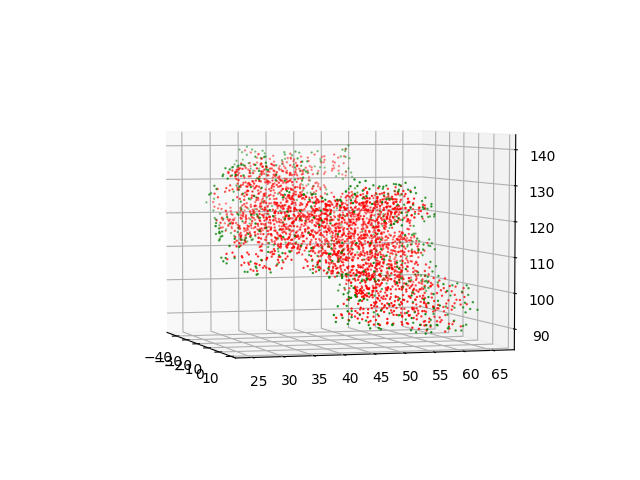

In [74]:
find_surface(omm_protein, grid_step=1, depth=4.)

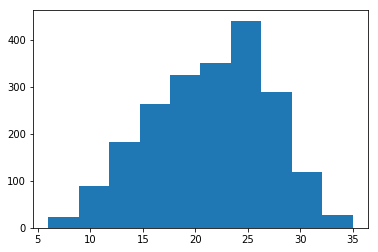

In [9]:
hess = surface_hessian(omm_protein)

In [47]:
hess2 = anm.getHessian()

In [77]:
np.linalg.norm(hess - hess.T)

1.228039607100904e-13

In [79]:
np.linalg.norm(hess - hess2)

2.8259473351637687e-12

In [78]:
hess[0:9, 0:9].round(-1)

array([[ 30.,   0.,  -0.,  -0.,  -0.,  -0.,  -0.,  -0.,   0.],
       [  0.,  20.,  -0.,  -0.,  -0.,  -0.,  -0.,  -0.,   0.],
       [ -0.,  -0.,  30.,  -0.,  -0.,  -0.,   0.,   0.,  -0.],
       [ -0.,  -0.,  -0.,  30.,  -0.,  -0.,  -0.,  -0.,   0.],
       [ -0.,  -0.,  -0.,  -0.,  30.,  -0.,  -0.,  -0.,   0.],
       [ -0.,  -0.,  -0.,  -0.,  -0.,  30.,   0.,   0.,  -0.],
       [ -0.,  -0.,   0.,  -0.,  -0.,   0.,  30.,   0., -10.],
       [ -0.,  -0.,   0.,  -0.,  -0.,   0.,   0.,  20., -10.],
       [  0.,   0.,  -0.,   0.,   0.,  -0., -10., -10.,  20.]])

In [50]:
hess2[0:15, 0:15].round(-1)

array([[ 30.,   0.,  -0.,  -0.,  -0.,  -0.,  -0.,  -0.,   0.,  -0.,   0.,
         -0.,  -0.,   0.,   0.],
       [  0.,  20.,  -0.,  -0.,  -0.,  -0.,  -0.,  -0.,   0.,   0.,  -0.,
          0.,   0.,  -0.,  -0.],
       [ -0.,  -0.,  30.,  -0.,  -0.,  -0.,   0.,   0.,  -0.,  -0.,   0.,
         -0.,   0.,  -0.,  -0.],
       [ -0.,  -0.,  -0.,  30.,  -0.,  -0.,  -0.,  -0.,   0.,  -0.,  -0.,
         -0.,  -0.,   0.,   0.],
       [ -0.,  -0.,  -0.,  -0.,  30.,  -0.,  -0.,  -0.,   0.,  -0.,  -0.,
         -0.,   0.,  -0.,  -0.],
       [ -0.,  -0.,  -0.,  -0.,  -0.,  30.,   0.,   0.,  -0.,  -0.,  -0.,
         -0.,   0.,  -0.,  -0.],
       [ -0.,  -0.,   0.,  -0.,  -0.,   0.,  30.,   0., -10.,  -0.,   0.,
         -0.,  -0.,   0.,   0.],
       [ -0.,  -0.,   0.,  -0.,  -0.,   0.,   0.,  20., -10.,   0.,  -0.,
          0.,   0.,  -0.,  -0.],
       [  0.,   0.,  -0.,   0.,   0.,  -0., -10., -10.,  20.,  -0.,   0.,
         -0.,   0.,  -0.,  -0.],
       [ -0.,   0.,  -0.,  -0.,  -0.,

In [ ]:
rw._anms[0].

In [9]:
k = 0
for atom in pdy_protein.iterAtoms():
    if k > 30:
        break
    print(atom.getResname(), atom.getResnum(), atom.getIndex())
    print(atom.getCoords())
    k += 1

GLY 1 0
[-25.033  26.159 126.826]
GLY 1 1
[-24.444  25.138 126.602]
GLY 1 2
[-26.154  25.742 126.883]
GLY 1 3
[-24.927  26.718 125.774]
GLY 1 4
[-24.502  26.565 128.169]
GLY 1 5
[-25.15   26.157 129.082]
GLY 1 6
[-23.374  26.182 128.245]
GLY 1 7
[-24.502  28.071 128.401]
GLY 1 8
[-23.732  28.588 129.219]
TRP 2 9
[-25.366  28.771 127.672]
TRP 2 10
[-26.334  28.216 127.262]
TRP 2 11
[-25.542  30.205 127.827]
TRP 2 12
[-24.795  30.556 128.677]
TRP 2 13
[-26.951  30.459 128.317]
TRP 2 14
[-27.883  29.794 127.873]
TRP 2 15
[-25.358  30.906 126.486]
TRP 2 16
[-25.962  31.929 126.429]
TRP 2 17
[-25.892  30.198 125.688]
TRP 2 18
[-23.93   31.051 126.044]
TRP 2 19
[-23.187  30.137 125.345]
TRP 2 20
[-23.376  29.021 124.984]
TRP 2 21
[-23.082  32.192 126.232]
TRP 2 22
[-21.834  31.893 125.637]
TRP 2 23
[-23.246  33.444 126.86 ]
TRP 2 24
[-24.134  33.459 127.636]
TRP 2 25
[-21.927  30.634 125.107]
TRP 2 26
[-21.119  29.895 124.646]
TRP 2 27
[-20.763  32.784 125.649]
TRP 2 28
[-19.812  32.334 125.

In [2]:
def get_supported_heavy_elements(forcefield):
    """
        Searches heavy elements that are presented in the forcefield residue templates 
    
        :return: a set of supported elements
    """
    
    supported_heavy_elements = set()
    for resName, template in forcefield._templates.items():
        for atom in template.atoms:
            if atom.element is None:
                continue
            if atom.element.symbol != "H":
                supported_heavy_elements.add(atom.element)
    return supported_heavy_elements

In [3]:
def get_heavy_count(atoms, supported_heavy_elements):
    """
        Calculate signature of the set of atoms based on supported heavy elements
    
        :return: dictionary <element: count>
    """
    
    count = {element: 0 for element in supported_heavy_elements}
    for atom in atoms:
        if atom.element is not None and atom.element in supported_heavy_elements:
            count[atom.element] += 1
    return count

def compare_counts(count_1, count_2):
    """
        Compares two counts
        
        :return: True when every count is the same for both count_1 and count_2
    """
    
    if set(count_1.keys()) != set(count_2.keys()):
        return False
    for key in count_1:
        if count_1[key] != count_2[key]:
            return False
    return True

In [4]:
def get_signature_match(residue, forcefield, supported_heavy_elements):
    """
        Matches residue to forcefield templates by signature of heavy elements
        
        :return: matching template. None if no match was found
    """
    
    r_count = get_heavy_count(residue.atoms(), supported_heavy_elements)
    if residue.name != "HIS" and residue.name != "CYS":
        template = forcefield._templates[residue.name]
        t_count = get_heavy_count(template.atoms, supported_heavy_elements)
        if compare_counts(t_count, r_count):
            return template
        return None
    elif residue.name == "HIS":
        template_hip = (forcefield._templates["HIP"] if "HIP" in forcefield._templates else forcefield._templates["HSP"])
        template_hie = (forcefield._templates["HIE"] if "HIE" in forcefield._templates else forcefield._templates["HSE"])
        template_hid = (forcefield._templates["HID"] if "HID" in forcefield._templates else forcefield._templates["HSD"])
        t_count = get_heavy_count(template_hip.atoms, supported_heavy_elements)
        if compare_counts(t_count, r_count):
            return template_hip
        t_count = get_heavy_count(template_hie.atoms, supported_heavy_elements)
        if compare_counts(t_count, r_count):
            return template_hie
        t_count = get_heavy_count(template_hid.atoms, supported_heavy_elements)
        if compare_counts(t_count, r_count):
            return template_hid
        return None
    elif residue.name == "CYS":
        template_cys = forcefield._templates["CYS"]
        t_count = get_heavy_count(template_cys.atoms, supported_heavy_elements)
        if compare_counts(t_count, r_count):
            return template_cys
        if "CYX" in forcefield._templates:
            template_cyx = forcefield._templates["CYX"]
            t_count = get_heavy_count(template_cyx.atoms, supported_heavy_elements)
            if compare_counts(t_count, r_count):
                return template_cyx
        return None

def match_topology(residue, template, supported_heavy_elements):
    """
        Checks if residue topology restricted to heavy elements matches template topology
        
        :return: True if all internal bonds are the same
    """
    
    t_atoms = list(template.atoms)
    r_atoms = list(residue.atoms())
    t_bonds = set()
    r_bonds = set()
    r_number_to_name = {a.index: a.name for a in r_atoms}
    t_number_to_name = {i: a.name for i, a in enumerate(t_atoms) if a.element in supported_heavy_elements}
    for bond in template.bonds:
        if bond[0] in t_number_to_name and bond[1] in t_number_to_name:
            t_bonds.add(frozenset({t_number_to_name[bond[0]], t_number_to_name[bond[1]]}))
    for bond in residue.internal_bonds():
        r_bonds.add(frozenset({r_number_to_name[bond[0].index], r_number_to_name[bond[1].index]}))
    return t_bonds == r_bonds
    

            

In [5]:
def match_heavy_atoms(structure, forcefield):
    """
    Checks if structure topology of heavy atoms matches forcefield templates
    
    :return: list of unmatched residues if any were found and empty list otherwise
    """
    
    unmatched_residues = []
    supported_heavy_elements = get_supported_heavy_elements(forcefield)
    for chain in structure.topology.chains():
        for residue in chain.residues():
            # basic check
            if residue.name not in forcefield._templates and residue.name != "HIS" and residue.name != "CYS":
                raise ValueError(f"Unsupported residue name: {residue.name}")
            if any([a.element not in supported_heavy_elements for a in residue.atoms()]):
                raise ValueError("A residue contains elements that are not supported by the force field")
            
            # check signature
            template = get_signature_match(residue, forcefield, supported_heavy_elements)
            if template is None:
                unmatched_residues.append(residue)
                continue
            
            # check topology
            if not match_topology(residue, template, supported_heavy_elements):
                unmatched_residues.append(residue)
                continue
    return unmatched_residues

In [6]:
pdb_id = "2buo"
pdb_path = project.data_path / "benchmark" / "originA" / (pdb_id + "_cleanA.pdb")
seq_path = project.data_path / "benchmark" / "sequences" / (pdb_id + ".fasta.txt")

In [7]:
omm_struct = app.PDBFile(str(pdb_path))
seq = SeqIO.parse(str(seq_path), "fasta")

In [9]:
fixer = PDBFixer(filename=str(pdb_path))
fixer.findMissingResidues()
fixer.findNonstandardResidues()
fixer.replaceNonstandardResidues()
fixer.removeHeterogens(True)
fixer.findMissingAtoms()
fixer.addMissingAtoms()
fixer.addMissingHydrogens(7.0)
app.PDBFile.writeFile(fixer.topology, fixer.positions, open(str(project.output_path / 'output.pdb'), 'w'))

In [10]:
omm_struct = app.PDBFile(str(project.output_path / 'output.pdb'))

In [ ]:
create_system

In [11]:
amber = "amber14/protein.ff14SB.xml"
charmm = "charmm36.xml"
forcefield = app.ForceField(amber)
modeller = app.Modeller(omm_struct.topology, omm_struct.positions)
modeller.addHydrogens(forcefield=forcefield, pH=7.0)


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 'HID',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [82]:
carbon = app.element.get_by_symbol("C")
counter = 0
print(type(forcefield._templates))
for resName, t in forcefield._templates.items():
    counter += 1
    print(resName)
    for j, atom in enumerate(t.atoms):
        print(f"\t{j}: {atom.name}; {atom.element}")
print(counter)

<class 'dict'>
ALA
	0: N; <Element nitrogen>
	1: H; <Element hydrogen>
	2: CA; <Element carbon>
	3: HA; <Element hydrogen>
	4: CB; <Element carbon>
	5: HB1; <Element hydrogen>
	6: HB2; <Element hydrogen>
	7: HB3; <Element hydrogen>
	8: C; <Element carbon>
	9: O; <Element oxygen>
ARG
	0: N; <Element nitrogen>
	1: H; <Element hydrogen>
	2: CA; <Element carbon>
	3: HA; <Element hydrogen>
	4: CB; <Element carbon>
	5: HB2; <Element hydrogen>
	6: HB3; <Element hydrogen>
	7: CG; <Element carbon>
	8: HG2; <Element hydrogen>
	9: HG3; <Element hydrogen>
	10: CD; <Element carbon>
	11: HD2; <Element hydrogen>
	12: HD3; <Element hydrogen>
	13: NE; <Element nitrogen>
	14: HE; <Element hydrogen>
	15: CZ; <Element carbon>
	16: NH1; <Element nitrogen>
	17: HH11; <Element hydrogen>
	18: HH12; <Element hydrogen>
	19: NH2; <Element nitrogen>
	20: HH21; <Element hydrogen>
	21: HH22; <Element hydrogen>
	22: C; <Element carbon>
	23: O; <Element oxygen>
ASH
	0: N; <Element nitrogen>
	1: H; <Element hydrogen>


In [83]:
app.element.Element()


TypeError: __init__() missing 4 required positional arguments: 'number', 'name', 'symbol', and 'mass'

In [97]:
get_supported_heavy_elements(forcefield)

{<Element carbon>, <Element nitrogen>, <Element oxygen>, <Element sulfur>}

In [102]:
match_heavy_atoms(omm_struct, forcefield)

[<Residue 79 (HIS) of chain 0>,
 <Residue 84 (LEU) of chain 0>,
 <Residue 96 (PRO) of chain 1>]

In [116]:
s = next(seq)


In [118]:
s2 = next(seq)

In [124]:
len(s)

86

In [125]:
len(s2)

12

In [130]:
s2[]

SeqRecord(seq=Seq('ITFEDLLDYYGP', SingleLetterAlphabet()), id='2BUO:T|PDBID|CHAIN|SEQUENCE', name='2BUO:T|PDBID|CHAIN|SEQUENCE', description='2BUO:T|PDBID|CHAIN|SEQUENCE', dbxrefs=[])

In [ ]:
app.topology.Residue

In [105]:
unmached = forcefield.getUnmatchedResidues(modeller.topology)

In [106]:
for u in unmached:
    print(u)

<Residue 0 (PRO) of chain 0>
<Residue 1 (THR) of chain 0>
<Residue 2 (SER) of chain 0>
<Residue 3 (ILE) of chain 0>
<Residue 4 (LEU) of chain 0>
<Residue 5 (ASP) of chain 0>
<Residue 6 (ILE) of chain 0>
<Residue 7 (ARG) of chain 0>
<Residue 8 (GLN) of chain 0>
<Residue 9 (GLY) of chain 0>
<Residue 10 (PRO) of chain 0>
<Residue 11 (LYS) of chain 0>
<Residue 12 (GLU) of chain 0>
<Residue 13 (PRO) of chain 0>
<Residue 14 (PHE) of chain 0>
<Residue 15 (ARG) of chain 0>
<Residue 16 (ASP) of chain 0>
<Residue 17 (TYR) of chain 0>
<Residue 18 (VAL) of chain 0>
<Residue 19 (ASP) of chain 0>
<Residue 20 (ARG) of chain 0>
<Residue 21 (PHE) of chain 0>
<Residue 22 (TYR) of chain 0>
<Residue 23 (LYS) of chain 0>
<Residue 24 (THR) of chain 0>
<Residue 25 (LEU) of chain 0>
<Residue 26 (ARG) of chain 0>
<Residue 27 (ALA) of chain 0>
<Residue 28 (GLU) of chain 0>
<Residue 29 (GLN) of chain 0>
<Residue 30 (ALA) of chain 0>
<Residue 31 (SER) of chain 0>
<Residue 32 (GLN) of chain 0>
<Residue 33 (GLU) of

In [96]:
d1 = {"d": 3, "h": 1}
d2 = {"h": 1, "d": 3}
compare_counts(d1, d2)

True

In [35]:
dir(app.topology.Residue)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'atoms',
 'bonds',
 'external_bonds',
 'internal_bonds']

In [103]:
231-147+13

97